  ## OSEMN dataframe for Data Science

This Kernel shows a basic application of OSEMN dataframe for Data Science using TreeClassifier and some metrics for Classification.

I will use a dataset from https://archive.ics.uci.edu/ml/datasets/Acute+Inflammations.

"The data was created by a medical expert as a data set to test the expert system, which will perform the presumptive diagnosis of two diseases of urinary system. The basis for rules detection was Rough Sets Theory. Each instance represents an potential patient."


In [4]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "data/source.jpg")

-- Attribute lines:
For example, '35,9 no no yes yes yes yes no'

Where:
- '35,9' Temperature of patient
- 'no' Occurrence of nausea
- 'no' Lumbar pain
- 'yes' Urine pushing (continuous need for urination)
- 'yes' Micturition pains
- 'yes' Burning of urethra, itch, swelling of urethra outlet

Targets:
- 'yes' decision: Inflammation of urinary bladder
- 'no' decision: Nephritis of renal pelvis origin

-- Attribute Information:

- a1 Temperature of patient { 35C-42C }
- a2 Occurrence of nausea { yes, no }
- a3 Lumbar pain { yes, no }
- a4 Urine pushing (continuous need for urination) { yes, no }
- a5 Micturition pains { yes, no }
- a6 Burning of urethra, itch, swelling of urethra outlet { yes, no }

- d1 decision: Inflammation of urinary bladder { yes, no }
- d2 decision: Nephritis of renal pelvis origin { yes, no } 

#### 1. Obtain Data

In [5]:
import pandas as pd
import numpy as np
%matplotlib inline

In [6]:
df=pd.read_csv('data/diagnosis.csv',header=None) 

In [7]:
df.head()

,0,1,2,3,4,5,6,7
0,"35,5",no,yes,no,no,no,no,no
1,"35,9",no,no,yes,yes,yes,yes,no
2,"35,9",no,yes,no,no,no,no,no
3,"36,0",no,no,yes,yes,yes,yes,no
4,"36,0",no,yes,no,no,no,no,no


In [8]:
df.shape

(120, 8)

We only have 120 examples with 6 features and 2 targets or labels

#### 2.Scrub Data

Rename the columns

In [9]:
df=df.rename(columns={
    0:'temperature_patient',
    1:'occurrence_nausea',
    2:'lumbar_pain',
    3:'urine_pushing',
    4:'micturition_pains',
    5:'burning_urethra',
    6:'inflammation_urinary_bladder',
    7:'nephritis_renal_pelvis_origin'
})

In [10]:
df.head(5)

,temperature_patient,occurrence_nausea,lumbar_pain,urine_pushing,micturition_pains,burning_urethra,inflammation_urinary_bladder,nephritis_renal_pelvis_origin
0,"35,5",no,yes,no,no,no,no,no
1,"35,9",no,no,yes,yes,yes,yes,no
2,"35,9",no,yes,no,no,no,no,no
3,"36,0",no,no,yes,yes,yes,yes,no
4,"36,0",no,yes,no,no,no,no,no


**missing values**

In [11]:
print('Number of missing values for feature')
for col in df:
    nu_mv=len(df)-len(df[col].isnull())
    cont=0
    if nu_mv>=1:
        print('{}:  {}'.format( col,len(df)-len(df[col].isnull())))
        cont +=nu_mv
if cont==0:
        print('...No missing values')


Number of missing values for feature
...No missing values


**duplicated values**  (rows)

In [12]:
df_duplicados=df[df.duplicated()]
df_duplicados.head()

,temperature_patient,occurrence_nausea,lumbar_pain,urine_pushing,micturition_pains,burning_urethra,inflammation_urinary_bladder,nephritis_renal_pelvis_origin
5,"36,0",no,yes,no,no,no,no,no
10,"36,6",no,no,yes,yes,yes,yes,no
12,"36,6",no,yes,no,no,no,no,no
15,"36,7",no,yes,no,no,no,no,no
17,"36,8",no,no,yes,yes,yes,yes,no


In [13]:
df_duplicados.shape

(21, 8)

We have 21 'rows duplicated'

In [14]:
df_duplicados1=df_duplicados.query('inflammation_urinary_bladder == nephritis_renal_pelvis_origin')
df_duplicados1.sort_values(by=['inflammation_urinary_bladder'])


,temperature_patient,occurrence_nausea,lumbar_pain,urine_pushing,micturition_pains,burning_urethra,inflammation_urinary_bladder,nephritis_renal_pelvis_origin
5,"36,0",no,yes,no,no,no,no,no
12,"36,6",no,yes,no,no,no,no,no
15,"36,7",no,yes,no,no,no,no,no
41,"37,5",no,yes,no,no,no,no,no
74,"40,0",no,no,no,no,no,no,no
71,"40,0",yes,yes,yes,yes,yes,yes,yes
85,"40,4",yes,yes,yes,yes,no,yes,yes
99,"40,9",yes,yes,yes,yes,no,yes,yes


How we can se above, the rows are duplicates except on one or two columns ( examples  index 71,74).
The same for df_duplicados2.

In [15]:
df_duplicados2=df_duplicados.query('inflammation_urinary_bladder != nephritis_renal_pelvis_origin')
df_duplicados2.sort_values(by=['inflammation_urinary_bladder'])

,temperature_patient,occurrence_nausea,lumbar_pain,urine_pushing,micturition_pains,burning_urethra,inflammation_urinary_bladder,nephritis_renal_pelvis_origin
61,"38,0",no,yes,yes,no,yes,no,yes
76,"40,0",yes,yes,no,yes,no,no,yes
119,"41,5",no,yes,yes,no,yes,no,yes
10,"36,6",no,no,yes,yes,yes,yes,no
17,"36,8",no,no,yes,yes,yes,yes,no
21,"37,0",no,no,yes,yes,no,yes,no
24,"37,0",no,no,yes,yes,yes,yes,no
25,"37,0",no,no,yes,yes,yes,yes,no
26,"37,0",no,no,yes,yes,yes,yes,no
44,"37,5",no,no,yes,no,no,yes,no


**duplicated values** (cols)

In [16]:
print('Valores repetidos por columna \n')
for col in df:
    if df[col].dtype == 'object':
        print("{} : {:.2f} %".format(col,(df[col].describe().freq/len(df)*100)))

Valores repetidos por columna 

temperature_patient : 6.67 %
occurrence_nausea : 75.83 %
lumbar_pain : 58.33 %
urine_pushing : 66.67 %
micturition_pains : 50.83 %
burning_urethra : 58.33 %
inflammation_urinary_bladder : 50.83 %
nephritis_renal_pelvis_origin : 58.33 %


In [17]:
df.describe(include='all')

,temperature_patient,occurrence_nausea,lumbar_pain,urine_pushing,micturition_pains,burning_urethra,inflammation_urinary_bladder,nephritis_renal_pelvis_origin
count,120,120,120,120,120,120,120,120
unique,44,2,2,2,2,2,2,2
top,"40,0",no,yes,yes,no,no,no,no
freq,8,91,70,80,61,70,61,70


Like all the features (except 'occurrence_nausea') have only two unique values, we can have an idea about the frequency of each value.

'temperature_patient' have 44 unique values, so I will apply merge over them.

In [18]:
df['temperature_patient'] = df.temperature_patient.str.replace(',', '.').astype(float)
df.head()

,temperature_patient,occurrence_nausea,lumbar_pain,urine_pushing,micturition_pains,burning_urethra,inflammation_urinary_bladder,nephritis_renal_pelvis_origin
0,35.5,no,yes,no,no,no,no,no
1,35.9,no,no,yes,yes,yes,yes,no
2,35.9,no,yes,no,no,no,no,no
3,36.0,no,no,yes,yes,yes,yes,no
4,36.0,no,yes,no,no,no,no,no


In [19]:
df.describe()

,temperature_patient
count,120.000000
mean,38.724167
std,1.819132
min,35.500000
25%,37.100000
50%,37.950000
75%,40.600000
max,41.500000


In [20]:
#quartiles
range_temp = ['0.2','0.4','0.6','0.8','1.0']
df['range_temperature_patient'] = pd.qcut(df['temperature_patient'], 5, labels=range_temp)
df.range_temperature_patient=df.range_temperature_patient.astype('float')

In [21]:
df.range_temperature_patient.value_counts()

0.6    30
0.2    28
1.0    23
0.4    20
0.8    19
Name: range_temperature_patient, dtype: int64

Convert the features as categorical data

In [22]:
df=df.replace('no',0).replace('yes',1)
df.head()

,temperature_patient,occurrence_nausea,lumbar_pain,urine_pushing,micturition_pains,burning_urethra,inflammation_urinary_bladder,nephritis_renal_pelvis_origin,range_temperature_patient
0,35.5,0,1,0,0,0,0,0,0.2
1,35.9,0,0,1,1,1,1,0,0.2
2,35.9,0,1,0,0,0,0,0,0.2
3,36.0,0,0,1,1,1,1,0,0.2
4,36.0,0,1,0,0,0,0,0,0.2


#### 3.Explore Data

In [23]:
df.dtypes

temperature_patient              float64
occurrence_nausea                  int64
lumbar_pain                        int64
urine_pushing                      int64
micturition_pains                  int64
burning_urethra                    int64
inflammation_urinary_bladder       int64
nephritis_renal_pelvis_origin      int64
range_temperature_patient        float64
dtype: object

Using Profile Report we can check all results obtained above and identify other information about the dataset.

In [24]:
import pandas_profiling

pandas_profiling.ProfileReport(df)

Number of variables,9
Number of observations,120
Total Missing (%),0.0%
Total size in memory,8.5 KiB
Average record size in memory,72.7 B
Numeric,1
Categorical,0
Boolean,7
Date,0
Text (Unique),0
Rejected,1


In [25]:
df.head()

,temperature_patient,occurrence_nausea,lumbar_pain,urine_pushing,micturition_pains,burning_urethra,inflammation_urinary_bladder,nephritis_renal_pelvis_origin,range_temperature_patient
0,35.5,0,1,0,0,0,0,0,0.2
1,35.9,0,0,1,1,1,1,0,0.2
2,35.9,0,1,0,0,0,0,0,0.2
3,36.0,0,0,1,1,1,1,0,0.2
4,36.0,0,1,0,0,0,0,0,0.2


Separate the data into features and targets(labels).

In [26]:
df.columns

Index(['temperature_patient', 'occurrence_nausea', 'lumbar_pain',
       'urine_pushing', 'micturition_pains', 'burning_urethra',
       'inflammation_urinary_bladder', 'nephritis_renal_pelvis_origin',
       'range_temperature_patient'],
      dtype='object')

In [27]:
features=['occurrence_nausea', 'lumbar_pain',
       'urine_pushing', 'micturition_pains', 'burning_urethra',
       'range_temperature_patient']
labels=['inflammation_urinary_bladder', 'nephritis_renal_pelvis_origin']
X=df[features]
y=df[labels]

#### 4.Model Data

confusion_matrix accepts only one target, so two targets will convert to an one target.

In [28]:
clus=list()
for row in range(y.shape[0]):
    if y['inflammation_urinary_bladder'][row]==0 and y['nephritis_renal_pelvis_origin'][row]==0:
        clus.append(0)
    elif y['inflammation_urinary_bladder'][row]==0 and y['nephritis_renal_pelvis_origin'][row]==1:
        clus.append(1)
    elif y['inflammation_urinary_bladder'][row]==1 and y['nephritis_renal_pelvis_origin'][row]==0:
        clus.append(2)
    elif y['inflammation_urinary_bladder'][row]==1 and y['nephritis_renal_pelvis_origin'][row]==1:
        clus.append(3)
y_one_target=pd.DataFrame(clus)

**Tree Classifier** using train_test_split

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y_one_target, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier(random_state=0)
clf=clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)



**Evaluate the model** with Accuracy and Confusion Matrix

In [30]:
print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  1.0


In [31]:
print('Confusion Matrix')
confusion_matrix(y_test, y_pred)

Confusion Matrix


array([[6, 0, 0, 0],
       [0, 6, 0, 0],
       [0, 0, 9, 0],
       [0, 0, 0, 3]], dtype=int64)

**TreeClassifier with data train**

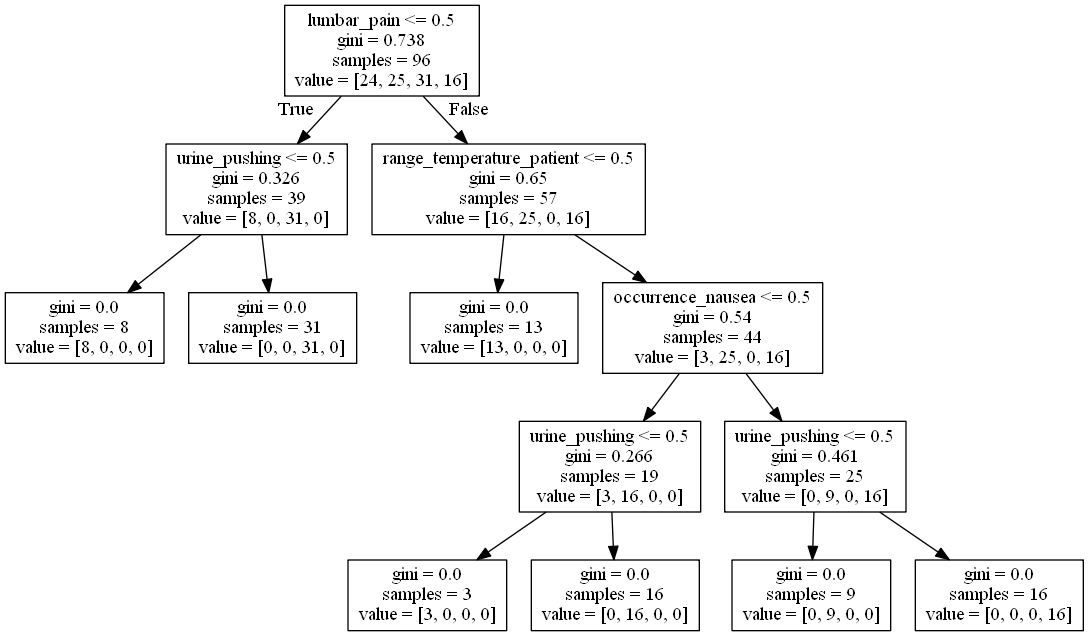

In [42]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
import pydotplus

dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=features)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  